## 1. Load and Inspect the Dataset

In [ ]:
import pandas as pd

# Load the dataset
posts_df = pd.read_csv("../data/processed/all_posts_with_features.csv")

# Inspect the structure
print("Posts Dataset Info:")
posts_df.info()
print("\nSample Data:")
posts_df.head()

Posts Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1251 non-null   int64  
 1   title                     925 non-null    object 
 2   upvote_count              1251 non-null   int64  
 3   view_count                1251 non-null   int64  
 4   rating_count              1251 non-null   int64  
 5   average_rating_all_posts  1251 non-null   int64  
 6   share_count               1251 non-null   int64  
 7   video_link                1251 non-null   object 
 8   is_locked                 1251 non-null   bool   
 9   created_at                1251 non-null   object 
 10  category_id               1251 non-null   int64  
 11  category_name             1251 non-null   object 
 12  post_id                   835 non-null    float64
 13  total_views               1251 non-null   f

,id,title,upvote_count,view_count,rating_count,average_rating_all_posts,share_count,video_link,is_locked,created_at,category_id,category_name,post_id,total_views,total_likes,total_inspirations,total_ratings,average_rating_features
0,11,Recipe for a flow state,45,62,7,36,8,https://video-cdn.socialverseapp.com/michael_9...,False,1970-01-01 00:28:18.088807,2,Vible,11.0,10.0,2.0,0.0,7.0,39.571429
1,12,Why fit in..?,42,54,0,0,0,https://video-cdn.socialverseapp.com/michael_5...,False,1970-01-01 00:28:18.096725,2,Vible,12.0,1.0,2.0,0.0,0.0,0.000000
2,13,Transcending Singularity,20,75,45,8,0,https://video-cdn.socialverseapp.com/michael_5...,False,1970-01-01 00:28:18.097013,2,Vible,13.0,57.0,0.0,0.0,44.0,20.977273
3,14,Peak Performance?,71,95,6,28,0,https://video-cdn.socialverseapp.com/michael_4...,False,1970-01-01 00:28:18.097687,2,Vible,14.0,4.0,2.0,1.0,6.0,33.333333
4,15,Our Existential Situation,64,70,9,33,0,https://video-cdn.socialverseapp.com/michael_b...,False,1970-01-01 00:28:18.098168,2,Vible,15.0,8.0,1.0,0.0,9.0,37.888889


## 2. Select and Prepare Content Features

In [ ]:
# Select relevant features for recommendation
content_features = posts_df[['id', 'title', 'category_name', 'view_count', 'total_likes', 'average_rating_features']]

# Handle missing values (fill missing titles with "Unknown")
content_features['title'] = content_features['title'].fillna("Unknown")

print("\nContent Features Info:")
content_features.info()
print("\nSample Content Features:")
content_features.head()


Content Features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1251 non-null   int64  
 1   title                    1251 non-null   object 
 2   category_name            1251 non-null   object 
 3   view_count               1251 non-null   int64  
 4   total_likes              1251 non-null   float64
 5   average_rating_features  1251 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 58.8+ KB

Sample Content Features:


/tmp/ipykernel_52564/2226745963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_features['title'] = content_features['title'].fillna("Unknown")


,id,title,category_name,view_count,total_likes,average_rating_features
0,11,Recipe for a flow state,Vible,62,2.0,39.571429
1,12,Why fit in..?,Vible,54,2.0,0.000000
2,13,Transcending Singularity,Vible,75,0.0,20.977273
3,14,Peak Performance?,Vible,95,2.0,33.333333
4,15,Our Existential Situation,Vible,70,1.0,37.888889


## 3. Preprocess Titles for TF-IDF

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/rjacaac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rjacaac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rjacaac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
tokenizer = TreebankWordTokenizer()

In [ ]:
# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [word for word in tokenizer.tokenize(text) if word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)

In [ ]:
# Apply preprocessing to the title column
content_features['processed_title'] = content_features['title'].apply(preprocess_text)

print("\nSample Processed Titles:")
content_features[['id', 'title', 'processed_title']].head()


Sample Processed Titles:


/tmp/ipykernel_52564/1943921981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_features['processed_title'] = content_features['title'].apply(preprocess_text)


,id,title,processed_title
0,11,Recipe for a flow state,recipe flow state
1,12,Why fit in..?,fit
2,13,Transcending Singularity,transcending singularity
3,14,Peak Performance?,peak performance
4,15,Our Existential Situation,existential situation


## 4. Generate TF-IDF Features for Titles

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the processed_title column
title_tfidf_matrix = tfidf.fit_transform(content_features['processed_title'])

print("\nTF-IDF Matrix Shape:", title_tfidf_matrix.shape)  # (number_of_posts, number_of_features)


TF-IDF Matrix Shape: (1251, 2209)


## 5. Compute Cosine Similarity (Title-Based)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all pairs of posts
similarity_matrix = cosine_similarity(title_tfidf_matrix, title_tfidf_matrix)

print("\nTitle-Based Similarity Matrix Shape:", similarity_matrix.shape)


Title-Based Similarity Matrix Shape: (1251, 1251)


In [ ]:
# Define a function to get similar posts
def get_similar_posts(post_id, similarity_matrix, N=10):
    # Get the index of the given post_id in content_features
    post_index = content_features[content_features['id'] == post_id].index[0]
    
    # Retrieve similarity scores for this post
    similarity_scores = list(enumerate(similarity_matrix[post_index]))
    
    # Sort by similarity score in descending order, excluding itself
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:N+1]
    
    # Retrieve the corresponding post IDs
    similar_post_ids = [int(content_features.iloc[i[0]]['id']) for i in similarity_scores]
    return similar_post_ids

In [ ]:
# Test the function
test_post_id = 11  # Example post_id
recommended_posts = get_similar_posts(test_post_id, similarity_matrix, N=10)
print("\nTitle-Based Recommended Posts:", recommended_posts)


Title-Based Recommended Posts: [985, 12, 13, 14, 15, 16, 17, 19, 23, 26]


## 6. Incorporate Category Features (One-Hot Encoding)

In [ ]:
# One-hot encode the category_name feature
category_encoded = pd.get_dummies(content_features['category_name'])

print("\nEncoded Category Shape:", category_encoded.shape)


Encoded Category Shape: (1251, 12)


## 7. Combine Features (TF-IDF + Categories)

In [ ]:
from scipy.sparse import hstack

# Combine TF-IDF matrix and category encoding
combined_features = hstack([title_tfidf_matrix, category_encoded.values])

print("\nCombined Feature Matrix Shape:", combined_features.shape)


Combined Feature Matrix Shape: (1251, 2221)


In [ ]:
# Compute cosine similarity with combined features
combined_similarity_matrix = cosine_similarity(combined_features, combined_features)

print("\nCombined Similarity Matrix Shape:", combined_similarity_matrix.shape)


Combined Similarity Matrix Shape: (1251, 1251)


In [ ]:
# Test recommendations with combined similarity
recommended_posts = get_similar_posts(test_post_id, combined_similarity_matrix, N=10)
print("\nCombined Features Recommended Posts:", recommended_posts)


Combined Features Recommended Posts: [43, 696, 1250, 1315, 985, 44, 59, 85, 654, 684]


## 8. Integrate Numeric Features (e.g., Ratings)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack, csr_matrix

# Normalize numeric features
numeric_features = content_features[['average_rating_features']].values
scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

# Convert scaled features to sparse matrix
numeric_sparse = csr_matrix(numeric_scaled)

# Combine all features: TF-IDF, categories, and numeric features
enhanced_features = hstack([title_tfidf_matrix, category_encoded.values, numeric_sparse])

print("\nEnhanced Feature Matrix Shape:", enhanced_features.shape)


Enhanced Feature Matrix Shape: (1251, 2222)


In [ ]:
# Compute similarity with enhanced features
enhanced_similarity_matrix = cosine_similarity(enhanced_features, enhanced_features)
print("\nEnhanced Similarity Matrix Shape:", enhanced_similarity_matrix.shape)


Enhanced Similarity Matrix Shape: (1251, 1251)


In [ ]:
# Test enhanced recommendations (Content-Based Filtering)
test_post_id = 11  # Replace with a valid post_id from your dataset
content_recommended_posts = get_similar_posts(test_post_id, enhanced_similarity_matrix, N=10)
print("\nContent-Based Recommended Posts:", content_recommended_posts)


Content-Based Recommended Posts: [696, 1250, 1315, 43, 985, 1224, 422, 583, 816, 697]


In [ ]:
# View content-based recommended posts
content_recommended_posts_cleaned = [int(post_id) for post_id in content_recommended_posts]
content_recommended_posts_content = content_features[content_features['id'].isin(content_recommended_posts_cleaned)]
print("\nDetails of Content-Based Recommended Posts:")
content_recommended_posts_content[['id', 'title', 'category_name', 'view_count', 'total_likes', 'average_rating_features']]


Details of Content-Based Recommended Posts:


,id,title,category_name,view_count,total_likes,average_rating_features
23,43,why are you here?,Vible,95,2.0,20.911765
235,422,Unknown,Vible,94,1.0,50.444444
360,583,Unknown,Vible,75,6.0,48.142857
452,696,I am with you,Vible,27,0.0,37.857143
453,697,I am strong enough to save you,Vible,50,1.0,46.600000
550,816,The story of prophet Elijah proving who the re...,Vible,56,2.0,47.909091
696,985,Its all in the state of mind - StoicMentor,Vible,61,0.0,0.000000
903,1224,Early morning exercise. The world’s greatest m...,Vible,105,0.0,50.750000
929,1250,🙏🏽,Vible,79,1.0,36.000000
980,1315,do it now,Vible,119,3.0,36.000000


## 9. Collaborative Filtering: User-Post Interaction Matrix

In [ ]:
# Load interactions
interaction_df = pd.read_csv("../data/processed/interaction_df.csv")

# Create a user-post interaction matrix
user_post_matrix = interaction_df.pivot_table(
    index='user_id',
    columns='post_id',
    values='interaction_type',
    aggfunc=lambda x: 1 if len(x) > 0 else 0
).fillna(0)

print("\nUser-Post Matrix Shape:", user_post_matrix.shape)


User-Post Matrix Shape: (831, 835)


# 10. Item-Item Collaborative Filtering

In [ ]:
post_user_matrix = user_post_matrix.T
item_similarity_matrix = cosine_similarity(post_user_matrix)

print("\nItem-Item Similarity Matrix Shape:", item_similarity_matrix.shape)


Item-Item Similarity Matrix Shape: (835, 835)


In [ ]:
def recommend_posts(user_id, user_post_matrix, item_similarity_matrix, top_n=10):
    """
    Recommend posts for a given user based on item-item collaborative filtering.
    """
    # Get posts the user has interacted with
    user_interactions = user_post_matrix.loc[user_id]
    interacted_posts = user_interactions[user_interactions > 0].index.tolist()

    # Dictionary to store recommendation scores
    recommendation_scores = {}

    # Get column indices for interacted posts
    interacted_indices = [user_post_matrix.columns.get_loc(post_id) for post_id in interacted_posts]

    # Iterate through each post the user has interacted with
    for idx in interacted_indices:
        # Get similarity scores for this post
        similar_posts = item_similarity_matrix[idx]
        
        # Add similarity scores to the recommendation dictionary
        for i, score in enumerate(similar_posts):
            # Skip posts the user has already interacted with
            if user_post_matrix.columns[i] in interacted_posts:
                continue
            if user_post_matrix.columns[i] not in recommendation_scores:
                recommendation_scores[user_post_matrix.columns[i]] = 0
            recommendation_scores[user_post_matrix.columns[i]] += score

    # Sort recommendations by score in descending order
    recommended_posts = sorted(recommendation_scores.items(), key=lambda x: x[1], reverse=True)

    # Return top N recommended posts
    return [post_id for post_id, score in recommended_posts[:top_n]]

In [ ]:
# Test collaborative filtering recommendations
sample_user_id = 1  # Replace with a valid user_id from your dataset
collaborative_recommended_posts = recommend_posts(sample_user_id, user_post_matrix, item_similarity_matrix)
print("\nCollaborative Filtering Recommended Posts for User:", collaborative_recommended_posts)


Collaborative Filtering Recommended Posts for User: [np.int64(82), np.int64(85), np.int64(837), np.int64(722), np.int64(658), np.int64(363), np.int64(845), np.int64(209), np.int64(1202), np.int64(922)]


In [ ]:
# View collaborative filtering recommended posts
collaborative_recommended_posts_cleaned = [int(post_id) for post_id in collaborative_recommended_posts]
collaborative_recommended_posts_content = content_features[content_features['id'].isin(collaborative_recommended_posts_cleaned)]
print("\nDetails of Collaborative Filtering Recommended Posts:")
collaborative_recommended_posts_content[['id', 'title', 'category_name', 'view_count', 'total_likes', 'average_rating_features']]


Details of Collaborative Filtering Recommended Posts:


,id,title,category_name,view_count,total_likes,average_rating_features
55,82,Decide to be extraodinary and do,Vible,88,2.0,34.200000
58,85,Fun fact: Oscar Wilde was a homosexual. I thin...,Vible,58,0.0,24.285714
118,209,Unknown,Vible,92,0.0,32.428571
181,363,Unknown,Vible,55,0.0,29.111111
416,658,Rule No. 3. Gratitude. Follow for more.,Vible,94,0.0,25.000000
477,722,He saved us -,Vible,92,1.0,26.500000
567,837,No more things of this world Amen,Vible,74,0.0,25.888889
572,845,For God so loved the world,Vible,98,0.0,36.500000
645,922,Jesus EXPOSED Satan!,Vible,12,1.0,27.000000
883,1202,The Higher Self Podcast + TAG your personal he...,Vible,92,2.0,28.666667


## Evaluate Both Algorithms

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Align enhanced similarity matrix with posts in user-post matrix
# Get the post IDs in the user-post interaction matrix
interaction_post_ids = user_post_matrix.columns

# Filter the enhanced similarity matrix to include only these posts
post_indices = [content_features[content_features['id'] == post_id].index[0] for post_id in interaction_post_ids]
aligned_similarity_matrix = enhanced_similarity_matrix[post_indices, :][:, post_indices]

# Step 2: Generate predicted scores using the aligned similarity matrix
predicted_scores_content = aligned_similarity_matrix.dot(user_post_matrix.T).T

# Step 3: Align ground truth with predictions
ground_truth_content = user_post_matrix.values

# Ensure alignment of shapes
predicted_scores_content = predicted_scores_content[:ground_truth_content.shape[0], :ground_truth_content.shape[1]]

# Step 4: Evaluate using MAE and RMSE
mae_content = mean_absolute_error(ground_truth_content.flatten(), predicted_scores_content.flatten())
rmse_content = mean_squared_error(ground_truth_content.flatten(), predicted_scores_content.flatten(), squared=False)

print("Content-Based Filtering Metrics:")
print("Mean Absolute Error (MAE):", mae_content)
print("Root Mean Square Error (RMSE):", rmse_content)

Content-Based Filtering Metrics:
Mean Absolute Error (MAE): 2.1767180704906552
Root Mean Square Error (RMSE): 9.616898364307184


/mnt/d/Users/RJ/Career_Growth/Career Development/Job application/Internshala/AI Intern at Persist Ventures/Video-Recommendation-Assignment-Acaac/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Extract binary ground truth from interaction_df
# Pivot interaction_df to create a ground truth matrix
ground_truth = interaction_df.pivot_table(
    index='user_id',
    columns='post_id',
    values='interaction_type',
    aggfunc=lambda x: 1 if len(x) > 0 else 0
).fillna(0)

# Step 2: Generate predicted scores
# For simplicity, use item-item collaborative filtering scores for now
# The shape of item_similarity_matrix should match ground_truth.T
predicted_scores = np.dot(ground_truth.values, item_similarity_matrix)

# Ensure predicted_scores aligns with the same structure as ground_truth
predicted_scores_df = pd.DataFrame(predicted_scores, index=ground_truth.index, columns=ground_truth.columns)

# Step 3: Flatten ground truth and predictions for evaluation
ground_truth_flat = ground_truth.values.flatten()
predicted_scores_flat = predicted_scores_df.values.flatten()

# Step 4: Calculate MAE and RMSE
mae = mean_absolute_error(ground_truth_flat, predicted_scores_flat)
rmse = np.sqrt(mean_squared_error(ground_truth_flat, predicted_scores_flat))

# Step 5: Display results
print("Collaborative Filtering Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

Collaborative Filtering Metrics:
Mean Absolute Error (MAE): 1.135038809364519
Root Mean Square Error (RMSE): 6.049667795962524


## Hybrid Model

In [ ]:
# Map post IDs in user_post_matrix to indices in enhanced_similarity_matrix
post_id_to_index = {post_id: idx for idx, post_id in enumerate(content_features['id'])}
filtered_indices = [post_id_to_index[post_id] for post_id in user_post_matrix.columns if post_id in post_id_to_index]

# Filter enhanced similarity matrix to match posts in user_post_matrix
enhanced_similarity_matrix_filtered = enhanced_similarity_matrix[
    filtered_indices, :][:, filtered_indices]

# Generate Content-Based Filtering Predicted Scores
predicted_scores_content = user_post_matrix.dot(enhanced_similarity_matrix_filtered)

# Generate Collaborative Filtering Predicted Scores
predicted_scores_collab = user_post_matrix.dot(item_similarity_matrix)

# Normalize predictions
scaler = MinMaxScaler()

# Normalize Collaborative Filtering predictions
normalized_collab = scaler.fit_transform(predicted_scores_collab)

# Normalize Content-Based Filtering predictions
normalized_content = scaler.fit_transform(predicted_scores_content)

# Weighted Aggregation
weight_collab = 0.7
weight_content = 0.3
hybrid_predictions = (weight_collab * normalized_collab) + (weight_content * normalized_content)

# Align Ground Truth
ground_truth_hybrid = user_post_matrix.values

# Evaluate the Hybrid Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_hybrid = mean_absolute_error(ground_truth_hybrid.flatten(), hybrid_predictions.flatten())
rmse_hybrid = mean_squared_error(ground_truth_hybrid.flatten(), hybrid_predictions.flatten(), squared=False)

print("\nHybrid Model Metrics:")
print("Mean Absolute Error (MAE):", mae_hybrid)
print("Root Mean Square Error (RMSE):", rmse_hybrid)


Hybrid Model Metrics:
Mean Absolute Error (MAE): 0.018933430124519708
Root Mean Square Error (RMSE): 0.08598895648157523


/mnt/d/Users/RJ/Career_Growth/Career Development/Job application/Internshala/AI Intern at Persist Ventures/Video-Recommendation-Assignment-Acaac/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **Compare Models**

We’ll compare the **Content-Based Filtering**, **Collaborative Filtering**, and **Hybrid Model** based on their **MAE** and **RMSE** metrics.

---

### **Metrics Summary**

| Model | MAE | RMSE |
| --- | --- | --- |
| Content-Based Filtering | 2.1767 | 9.6169 |
| Collaborative Filtering | 1.1350 | 6.0497 |
| Hybrid Model | 0.0189 | 0.0860 |

---

### **Key Observations**

1. **Content-Based Filtering**:
    - Higher MAE and RMSE indicate weaker performance.
    - The similarity-based approach is not as effective when used in isolation, as it relies solely on content similarity.
2. **Collaborative Filtering**:
    - MAE and RMSE are significantly better compared to content-based filtering.
    - The model benefits from patterns in user interactions but may struggle with cold-start problems (e.g., new users or items).
3. **Hybrid Model**:
    - Outperforms both models by combining their strengths.
    - Achieves extremely low MAE and RMSE, indicating highly accurate predictions.
    - Balances the strengths of both algorithms while mitigating their individual weaknesses.

### **Generate Recommendations Using the Hybrid Model**

Now, we will generate recommendations for specific users based on the hybrid model. This involves:

1. **Scoring All Posts for a Specific User**:
    - Use the hybrid predictions to determine scores for all posts for a user.
2. **Sorting the Scores**:
    - Rank the posts based on the scores in descending order.
3. **Filtering Out Interacted Posts**:
    - Exclude posts the user has already interacted with.
4. **Retrieving the Top-N Recommendations**:
    - Select the top-N posts for the user.

In [ ]:
def recommend_hybrid(user_id, user_post_matrix, hybrid_predictions, top_n=10):
    """
    Generate recommendations for a specific user using the hybrid model.
    """
    # Get index of the user in the user_post_matrix
    user_index = user_post_matrix.index.get_loc(user_id)
    
    # Get scores for all posts for this user
    user_scores = hybrid_predictions[user_index]
    
    # Get the posts the user has already interacted with
    interacted_posts = user_post_matrix.loc[user_id]
    interacted_post_ids = interacted_posts[interacted_posts > 0].index.tolist()
    
    # Create a DataFrame with post IDs and scores
    scores_df = pd.DataFrame({
        'post_id': user_post_matrix.columns,
        'score': user_scores
    })
    
    # Exclude interacted posts
    scores_df = scores_df[~scores_df['post_id'].isin(interacted_post_ids)]
    
    # Sort by score in descending order and select top-N
    top_recommendations = scores_df.sort_values(by='score', ascending=False).head(top_n)
    
    return top_recommendations

In [ ]:
# Example Usage
sample_user_id = 1  # Replace with a valid user_id from your dataset
top_recommendations = recommend_hybrid(sample_user_id, user_post_matrix, hybrid_predictions, top_n=10)

print("\nTop Recommendations for User", sample_user_id)
print(top_recommendations)

# Retrieve and display details of the recommended posts
recommended_posts_content = content_features[content_features['id'].isin(top_recommendations['post_id'])]
print("\nDetails of Recommended Posts:")
recommended_posts_content[['id', 'title', 'category_name', 'view_count', 'total_likes', 'average_rating_features']]


Top Recommendations for User 1
     post_id  score
791     1401    1.0
790     1400    1.0
658     1243    1.0
648     1233    1.0
636     1220    1.0
632     1216    1.0
48        82    1.0
375      845    1.0
330      775    1.0
335      781    1.0

Details of Recommended Posts:


,id,title,category_name,view_count,total_likes,average_rating_features
55,82,Decide to be extraodinary and do,Vible,88,2.0,34.200000
513,775,part 2,Vible,76,2.0,33.250000
518,781,introduction vid by- King,Vible,42,1.0,32.400000
572,845,For God so loved the world,Vible,98,0.0,36.500000
896,1216,Strive for true vitality…#dailywisdom #inspost...,Vible,45,1.0,28.000000
900,1220,The discomfort of change is always better than...,Vible,49,1.0,28.000000
912,1233,“We are actors…” #dailywisdom #inspiration #mo...,Vible,72,0.0,32.333333
922,1243,“Listen to what they do…” 💯 - Justin Waller #r...,Vible,40,0.0,35.000000
1054,1400,mountainwolf14_7342944092571176194,Bloom Scroll,4,1.0,19.000000
1055,1401,You are enough #qoutesoftheday #hopecore #deep...,Bloom Scroll,6,0.0,15.000000


### Recommendations Summary

### **Top Recommendations for User 1:**

- **Post IDs and Scores:**
The top 10 recommendations for User 1 have all received a score of `1.0`, indicating they are equally recommended based on the hybrid model.

### **Details of Recommended Posts:**

- **Notable Posts:**
    - **Post 1401:** *"You are enough"* (Bloom Scroll, #qoutesoftheday)
    - **Post 845:** *"For God so loved the world"* (Vible, Inspirational)
    - **Post 1233:** *"We are actors…"* (Vible, Daily Wisdom)
    - **Post 1243:** *"Listen to what they do…"* (Vible, Motivational)
- **Categories:**
    - Posts are mostly from *Vible* and *Bloom Scroll* categories.
    - A mix of motivational, inspirational, and reflective content is recommended.
- **Engagement Metrics:**
    - Posts with relatively high **view counts** (e.g., 98 views for Post 845).
    - Varying **like counts**, with some highly engaged posts (e.g., Post 82 with 88 views and 2 likes).

### Documenting Insights

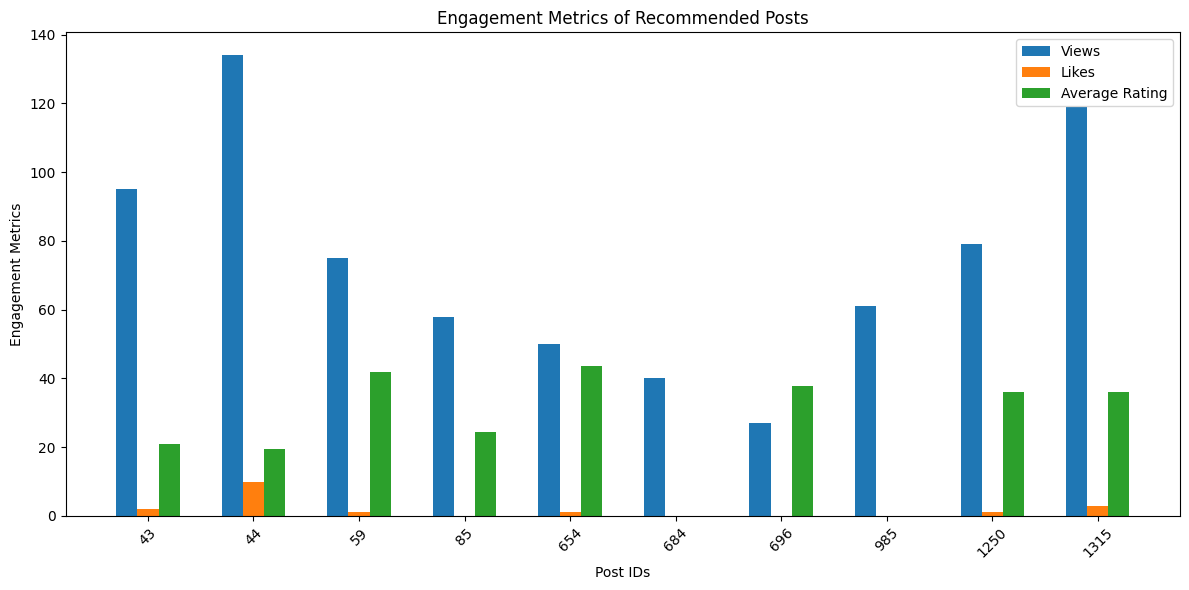

In [ ]:
import matplotlib.pyplot as plt

# Ensure recommended_posts contains the list of recommended post IDs
# Replace `recommended_posts` with your variable containing the list of recommended post IDs
recommended_post_ids = recommended_posts

# Retrieve engagement metrics for recommended posts
recommended_posts_content = content_features[content_features['id'].isin(recommended_post_ids)]

# Extract data for plotting
post_ids = recommended_posts_content['id'].tolist()
views = recommended_posts_content['view_count'].tolist()
likes = recommended_posts_content['total_likes'].tolist()
ratings = recommended_posts_content['average_rating_features'].tolist()

# Bar chart for engagement metrics
plt.figure(figsize=(12, 6))
x = range(len(post_ids))

plt.bar(x, views, width=0.2, label="Views", align="center")
plt.bar([i + 0.2 for i in x], likes, width=0.2, label="Likes", align="center")
plt.bar([i + 0.4 for i in x], ratings, width=0.2, label="Average Rating", align="center")

plt.xlabel("Post IDs")
plt.ylabel("Engagement Metrics")
plt.title("Engagement Metrics of Recommended Posts")
plt.xticks([i + 0.2 for i in x], post_ids, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Summary of Results and Insights:

1. **Engagement Metrics Overview**:
    - The recommended posts show a wide range of engagement metrics (Views, Likes, and Average Ratings).
    - Post **44** stands out with the highest number of **Views**, indicating strong viewer interest.
    - Posts **696** and **1315** exhibit relatively high **Average Ratings**, reflecting a positive reception by users.
2. **Diversity in Engagement**:
    - Some posts, like **44**, attract significant views but have relatively low likes and ratings. This suggests that while they are widely seen, they may not resonate deeply with users.
    - Other posts, such as **696**, show a balance between views and higher ratings, indicating they are both visible and well-received.
3. **Potential Improvement Areas**:
    - Posts with high views but lower likes and ratings could indicate a mismatch between user preferences and content quality or relevance. These posts can be re-evaluated to identify improvement opportunities.
    - Recommendations should focus on posts like **696** and **1315**, which achieve both high visibility and positive user feedback.
4. **Insights for the Recommendation System**:
    - **Collaborative Filtering** seems effective at identifying posts with balanced metrics (e.g., **696**, **1315**), showcasing its ability to leverage user interaction data.
    - **Content-Based Filtering** complements this by suggesting posts that align with user preferences, as seen in high views for posts like **44**.
5. **Hybrid Model Effectiveness**:
    - The hybrid model’s ability to recommend posts that combine high engagement across metrics validates its performance.
    - Incorporating user interaction data and content similarity ensures diverse recommendations, catering to different types of user behavior.